<a href="https://colab.research.google.com/github/sakibchowdhury131/sentimentAnalysisDL_v2.0/blob/main/sentimentAnalysis_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/gitdevqiang/Covid-19-Sentiment-Analysis.git

Cloning into 'Covid-19-Sentiment-Analysis'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 87 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [2]:
import os
os.chdir('/content/Covid-19-Sentiment-Analysis/Dataset')
os.listdir()

['train.csv', 'test_content.csv', 'val_content.csv']

In [3]:
import pandas as pd
def load_data(csv_file, columnNames = ['Tweet', 'Labels']): 
    dataset = pd.read_csv(csv_file)
    return dataset[columnNames]

In [4]:
df = load_data('train.csv')

In [5]:
df[0:10]

,Tweet,Labels
0,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,BanMediaHouse whose is responsible for spreadi...,6
2,Im waiting for someone to say to me that all t...,3 4
3,He is a liar. Proven day night. Time again. Li...,6
4,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8
5,Coronavirus impact Govt extends I-T deadlines ...,5 8
6,"42,000 people might have died in China from Co...",6 7 8
7,Dear Chinese! Kindly cook your bat thoroughly ...,5 10
8,This is how the govt of kenya is checking the ...,3 6 9
9,My mental health hasn't suffered at all under ...,10


In [6]:
! pip install num2words
import nltk
nltk.download('punkt')
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

     |████████████████████████████████| 102kB 9.2MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
corpus = []
stop_words = set(stopwords.words('english'))
for i in range (len(df)):
  review = re.sub('[^a-zA-Z@]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  bog = []
  for j in range (len(review)):
    if review[j].startswith('@') == False and not review[j] in stop_words:
      bog.append(review[j])
  bog = ' '.join(bog) 
  corpus.append(bog)

In [8]:
corpus[0:10]

['joke hop plane rn well covid lol',
 'banmediahouse whose responsible spreading fake communal stories pandemic corona situation',
 'im waiting someone say corona thing april fools joke',
 'liar proven day night time lies truth covid',
 'new u coronavirus death toll reaches nearly new deaths reported today bno news covid coronavirusoutbreak',
 'coronavirus impact govt extends deadlines related sections c',
 'people might died china covid china underreporting according sources',
 'dear chinese kindly cook bat thoroughly next time regards covid coronavirusupdates coronavirus',
 'govt kenya checking temperatures covid saying still low mtashangaa sana',
 'mental health suffered coronavirus quarantine ha ha april fools']

In [9]:
print(len(df['Labels']))

5000


In [10]:
import numpy as np
label = df['Labels'][0]
label = label.split()
print(label)

['0', '10']


In [11]:
def processLabels(labelsDF):
  num_class = 11
  dfLen = len(labelsDF)
  Y = np.zeros((dfLen, num_class), dtype = 'int')

  for i in range(len(labelsDF)):
    label = labelsDF[i]
    label = label.split()
    for word in label:
      x = int(word)
      Y[i, x] = 1
  return Y


In [12]:
Y = processLabels(labelsDF = df['Labels'])

In [13]:
texts = corpus

In [14]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize


tokens = []
for line in texts:
    words = word_tokenize(line)
    tokens.append(words)

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tokens)
sequences = tokenizer_obj.texts_to_sequences(tokens)

In [15]:
tokens[0:10]

[['joke', 'hop', 'plane', 'rn', 'well', 'covid', 'lol'],
 ['banmediahouse',
  'whose',
  'responsible',
  'spreading',
  'fake',
  'communal',
  'stories',
  'pandemic',
  'corona',
  'situation'],
 ['im',
  'waiting',
  'someone',
  'say',
  'corona',
  'thing',
  'april',
  'fools',
  'joke'],
 ['liar', 'proven', 'day', 'night', 'time', 'lies', 'truth', 'covid'],
 ['new',
  'u',
  'coronavirus',
  'death',
  'toll',
  'reaches',
  'nearly',
  'new',
  'deaths',
  'reported',
  'today',
  'bno',
  'news',
  'covid',
  'coronavirusoutbreak'],
 ['coronavirus',
  'impact',
  'govt',
  'extends',
  'deadlines',
  'related',
  'sections',
  'c'],
 ['people',
  'might',
  'died',
  'china',
  'covid',
  'china',
  'underreporting',
  'according',
  'sources'],
 ['dear',
  'chinese',
  'kindly',
  'cook',
  'bat',
  'thoroughly',
  'next',
  'time',
  'regards',
  'covid',
  'coronavirusupdates',
  'coronavirus'],
 ['govt',
  'kenya',
  'checking',
  'temperatures',
  'covid',
  'saying',
  

In [16]:
def getMaxLen(tokens):
  maxLen = 0
  for token in tokens:
    if len(token)>maxLen:
      maxLen = len(token)

  return maxLen
  

In [17]:
tokenizer_word_index = tokenizer_obj.word_index
max_length = getMaxLen(tokens)
print(max_length)
review_pad = pad_sequences(sequences, maxlen = max_length)

# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(review_pad, Y, test_size = 0.20, random_state = 42)


21


In [18]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,
       1126,   93,  650,   70,  154,  798,   12,  186,   93,  585],
      dtype=int32)

In [19]:
import gensim
import os
def load_glove(filename,tokenizer_word_index,EMBEDDING_DIM):
    
    embedding_index = {}
    
    
    f = open(os.path.join('',filename), encoding = "utf-8")
    
    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:])
        embedding_index[word] = coefs
    
    
    f.close()
    
    
    num_words = len(tokenizer_word_index) + 1
    embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))
    for word,i in tokenizer_word_index.items():
        if i> num_words:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix


In [20]:
def create_word2vec(directory,texts,EMBEDDING_DIM = 100,window = 5,workers = 4, min_count = 4,sg=1):
    tokens = []
    for line in texts:
        words = word_tokenize(line)
        tokens.append(words)
    
    model = gensim.models.Word2Vec(sentences = tokens, size = EMBEDDING_DIM, window = 5, workers = 4, min_count = 4,sg=1)
    print('Saving word2vec model in the disk')
    
    #filename = 'embeddings_w2v.txt'
    #model.wv.save_word2vec_format(directory+'/'+filename, binary = False)

    return model

In [21]:
num_words = len(tokenizer_word_index) + 1
print(num_words)

8992


In [22]:
model = create_word2vec(directory = '/content', texts = texts)
model.train(texts,total_examples=num_words, epochs=50)

Saving word2vec model in the disk


(7590333, 16676600)

In [23]:
sims = model.wv.most_similar('coronavirus', topn=10)  # get other similar words
print(sims)

[('march', 0.9967740774154663), ('reaches', 0.9961404204368591), ('china', 0.9960479140281677), ('jammu', 0.9958637952804565), ('hungary', 0.995718240737915), ('kashmir', 0.9955395460128784), ('tally', 0.9948338866233826), ('hours', 0.9947570562362671), ('outbreak', 0.9945591688156128), ('usa', 0.9944091439247131)]


In [24]:
filename = 'embeddings_w2v.txt'
model.wv.save_word2vec_format('/content'+'/'+filename, binary = False)

In [25]:
def load_word2vec(filename,tokenizer_word_index,EMBEDDING_DIM):
    
    embedding_index = {}
    
    
    f = open(os.path.join('',filename), encoding = "utf-8")
    
    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:])
        embedding_index[word] = coefs
    
    
    f.close()
    
    
    num_words = len(tokenizer_word_index) + 1
    embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))
    for word,i in tokenizer_word_index.items():
        if i> num_words:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix


embedding_matrix_w2v = load_word2vec('/content/embeddings_w2v.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)

In [26]:
embedding_matrix_w2v.shape

(8992, 100)

In [27]:
num_words = len(tokenizer_word_index) + 1
embedding_matrix_glove = load_glove('/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/data/glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)

In [28]:
from keras.layers import *
from keras.initializers import *
from keras import Model

In [29]:
import tensorflow as tf
def channelAttention(inLayer, n):
  att_1 = GlobalAveragePooling1D()(inLayer)
  att_1 = Dense(att_1.shape[-1]*n, activation = 'relu')(att_1)
  att_1 = Dense(int(att_1.shape[-1]/n), activation = 'sigmoid')(att_1)
  out = Multiply()([inLayer, tf.expand_dims(tf.expand_dims(att_1,axis=1), axis=1)])
  return out

In [30]:
def pixelAttention(inLayer, n):
  print(inLayer.shape)
  att_1 = Conv1DTranspose(filters = n*inLayer.shape[2], kernel_size = 3, strides = n, activation = 'relu')(inLayer)
  att_1 = BatchNormalization()(att_1)
  print(att_1.shape)
  att_1 = Conv1D(filters = inLayer.shape[2], kernel_size = 3, strides = n, activation = 'sigmoid')(att_1)
  att_1 = BatchNormalization()(att_1)
  print(att_1.shape)
  print(inLayer.shape)
  out = Multiply()([inLayer, att_1])
  '''
  out = Conv1D(filters = int(inLayer.shape[2]/n), kernel_size = 3, strides = n, activation = 'relu')(out)
  out = Conv1DTranspose(filters = inLayer.shape[-1], kernel_size = 3, strides = n, activation = 'sigmoid')(out)
  '''
  return out

In [31]:
def recurrentBlock(inputLayer, nodes):
  lstm_1 = Bidirectional(LSTM(nodes, return_sequences=True))(inputLayer)
  lstm_1 = BatchNormalization()(lstm_1)
  lstm_1 = Dropout(0.5)(lstm_1)
  lstm_1 = Activation('relu')(lstm_1)
  lstm_2 = Bidirectional(LSTM(int(nodes/2), return_sequences=True))(lstm_1)
  lstm_2 = BatchNormalization()(lstm_2)
  lstm_2 = Dropout(0.5)(lstm_2)
  lstm_2 = Activation('relu')(lstm_2)
  lstm_3 = Bidirectional(LSTM(int(nodes/4), return_sequences=True))(lstm_2)
  lstm_3 = BatchNormalization()(lstm_3)
  lstm_3 = Dropout(0.5)(lstm_3)
  lstm_3 = Activation('relu')(lstm_3)
  return lstm_3


def network():
  inp = Input((max_length,))
  embedding_layer = Embedding(num_words,
                              100,
                              embeddings_initializer = Constant(embedding_matrix_w2v),
                              #input_length = max_length,
                              trainable = False)(inp)
  
  conv_block1 = pixelAttention(embedding_layer, 16)
  conv_block1 = recurrentBlock(conv_block1, 64)
  conv_block1 = BatchNormalization()(conv_block1)
  flat = GlobalAveragePooling1D()(conv_block1)
  output = Dense(1, activation='softmax')(flat)

  model = Model(inputs = inp, outputs = output)
  model.summary()
  return model

model = network()

(None, 21, 100)
(None, 336, 1600)
(None, 21, 100)
(None, 21, 100)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 21)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 21, 100)      899200      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_transpose (Conv1DTranspo (None, 336, 1600)    481600      embedding[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 336, 1600)    6400        conv1d_transpose[0][0]           
____________________________

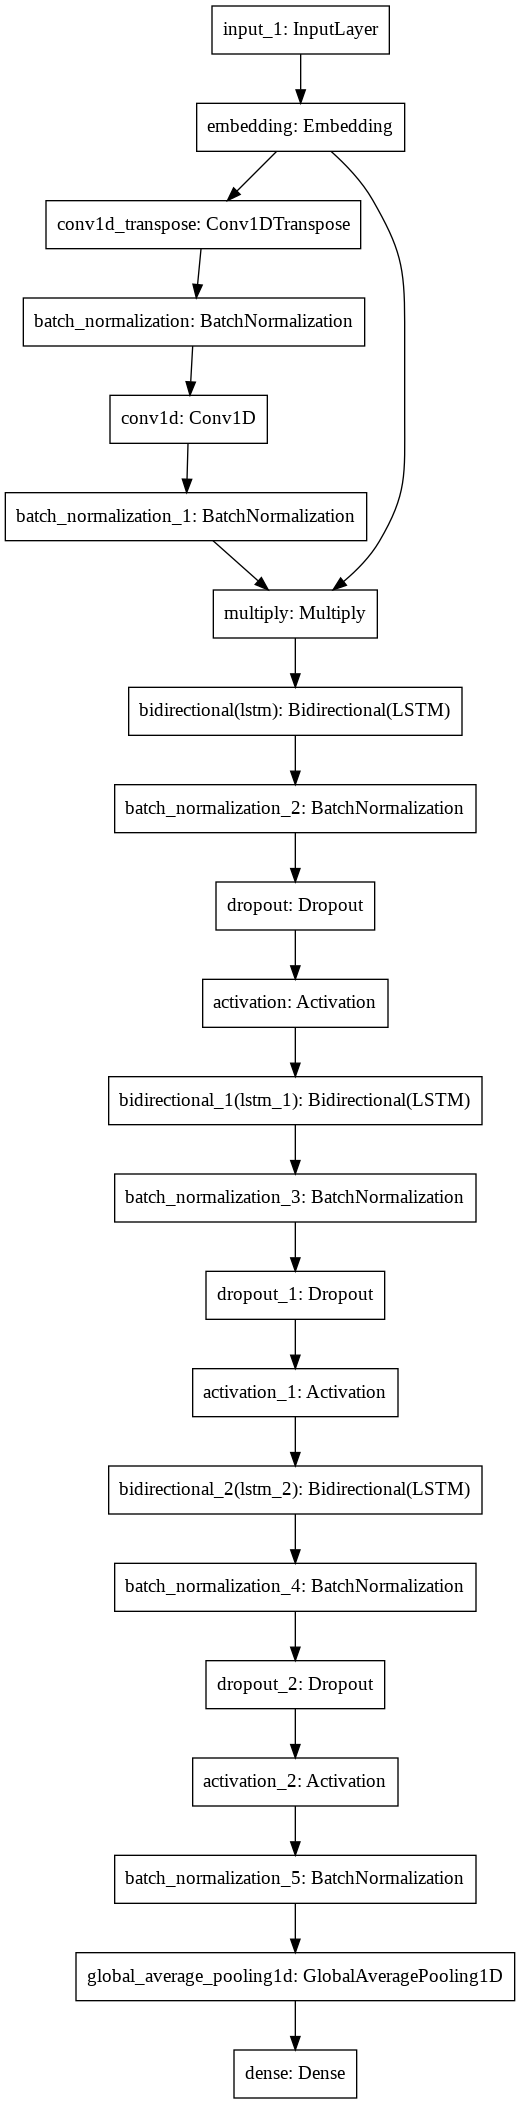

In [32]:
from keras.utils import plot_model
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
                      optimizer= Adam(lr = 0.0001),
                      metrics=['accuracy'])
plot_model(model)

In [33]:
from keras.callbacks import *
weight_saver = ModelCheckpoint('/content/simple_recurrent.h5', monitor='val_accuracy', 
                                save_best_only=True, save_weights_only=False, mode= 'max')

annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.0001,mode= 'min')

hist = model.fit( x = review_pad,
                  y = Y,  
                  batch_size = 16,
                  epochs = 600,
                  callbacks = [weight_saver , annealer],
                  validation_split = 0.2,
                  shuffle = False,
                  verbose = 1)

Epoch 1/600
250/250 [==============================] - 47s 33ms/step - loss: 0.7021 - accuracy: 0.3358 - val_loss: 0.6519 - val_accuracy: 0.3570
Epoch 2/600
250/250 [==============================] - 6s 24ms/step - loss: 0.6722 - accuracy: 0.3358 - val_loss: 0.6398 - val_accuracy: 0.3570
Epoch 3/600
250/250 [==============================] - 6s 25ms/step - loss: 0.6549 - accuracy: 0.3358 - val_loss: 0.6430 - val_accuracy: 0.3570
Epoch 4/600
250/250 [==============================] - 6s 25ms/step - loss: 0.6544 - accuracy: 0.3358 - val_loss: 0.6492 - val_accuracy: 0.3570
Epoch 5/600
250/250 [==============================] - 6s 24ms/step - loss: 0.6452 - accuracy: 0.3358 - val_loss: 0.6553 - val_accuracy: 0.3570
Epoch 6/600
250/250 [==============================] - 6s 24ms/step - loss: 0.6406 - accuracy: 0.3358 - val_loss: 0.6739 - val_accuracy: 0.3570
Epoch 7/600
250/250 [==============================] - 6s 24ms/step - loss: 0.6372 - accuracy: 0.3358 - val_loss: 0.6390 - val_accuracy

KeyboardInterrupt: ignored